In [8]:
!nvidia-smi

Thu Apr  6 09:20:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
cd /content/gdrive/MyDrive/weather_forecusting_prophet_model

/content/gdrive/MyDrive/weather_forecusting_prophet_model


In [1]:
!pip install neuralprophet

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from neuralprophet import NeuralProphet,set_log_level
set_log_level("ERROR")
import pickle

In [3]:
ls

 Volume in drive D is other
 Volume Serial Number is FC70-E7F8

 Directory of D:\weather_forecast

04/06/2023  03:27 PM    <DIR>          .
04/06/2023  03:27 PM    <DIR>          .ipynb_checkpoints
04/06/2023  03:27 PM           152,164 weather_forecasting_with _prophet_model (1).ipynb
04/05/2023  09:38 PM        14,239,516 weatherAUS.csv
               2 File(s)     14,391,680 bytes
               2 Dir(s)  342,003,920,896 bytes free


In [4]:
pwd

'D:\\weather_forecast'

In [5]:
df =pd.read_csv("weatherAUS.csv")
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


lets find the list location in the dataset

In [6]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [7]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

lets focus on Melbourne

In [8]:
#creating a melbourne location centric data frame named melb
melb =df[df['Location']=='Melbourne']
melb['Date']=pd.to_datetime(melb['Date'])
melb.head(5)

WARNING - (py.warnings._showwarnmsg) - C:\Users\A\AppData\Local\Temp\ipykernel_1540\1341522597.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb['Date']=pd.to_datetime(melb['Date'])



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
67200,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,60.0,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No
67201,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,66.0,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes
67202,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,72.0,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No
67203,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,87.0,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No
67204,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,...,81.0,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,No


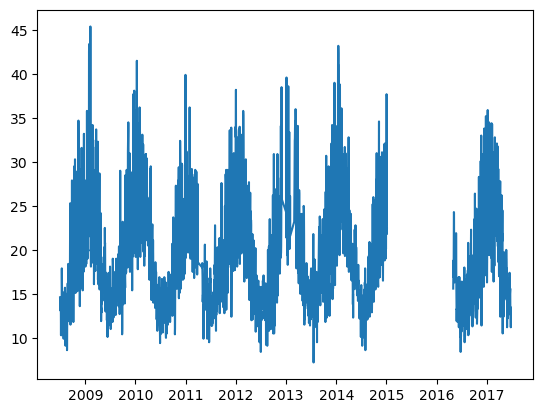

In [9]:
plt.plot(melb['Date'],melb['Temp3pm'])
plt.show()

so we have missing values from year 2015 .

WARNING - (py.warnings._showwarnmsg) - C:\Users\A\AppData\Local\Temp\ipykernel_1540\1630806145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb['Year'] = melb['Date'].apply(lambda x :x.year)



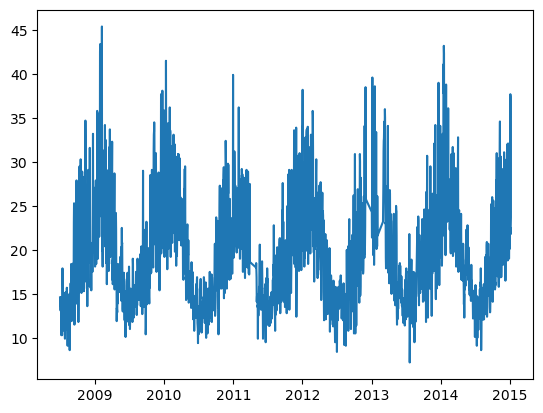

In [10]:
melb['Year'] = melb['Date'].apply(lambda x :x.year)
melb =melb[melb['Year']<=2015]
plt.plot(melb['Date'],melb['Temp3pm'])
plt.show()

In [11]:
melb.tail(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
69846,2015-12-27,Melbourne,NaN,NaN,NaN,4.4,8.9,SSE,48.0,SSW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69847,2015-12-28,Melbourne,NaN,NaN,NaN,6.0,13.3,SSE,39.0,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69848,2015-12-29,Melbourne,NaN,NaN,NaN,8.0,13.4,S,35.0,SSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69849,2015-12-30,Melbourne,NaN,NaN,NaN,7.0,12.4,SSE,44.0,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69850,2015-12-31,Melbourne,NaN,NaN,NaN,15.2,11.4,NNW,48.0,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


Now we have clean values. For prophet model we have to pass two veriables in 'ds' and 'y' fromat.

In [15]:
data =melb[['Date','Temp3pm']]
data.dropna(inplace=True)
data.columns = ['ds', 'y'] #we have to name columns as 'ds' and 'y' inorder to use prophet model.
data

WARNING - (py.warnings._showwarnmsg) - C:\Users\A\AppData\Local\Temp\ipykernel_1540\1470339491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
67200,2008-07-01,14.6
67201,2008-07-02,13.7
67202,2008-07-03,13.9
67203,2008-07-04,13.1
67204,2008-07-05,14.6
...,...,...
69486,2015-01-01,23.7
69487,2015-01-02,37.7
69488,2015-01-03,37.4
69489,2015-01-04,21.8


Model train

In [33]:
m = NeuralProphet()

m.fit(data,freq="D",epochs=1000) 

Finding best initial lr:   0%|          | 0/234 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,32.413746,39.533691,0.697076,0.0,0
1,31.155640,37.990013,0.657430,0.0,1
2,29.871561,36.653461,0.618563,0.0,2
3,28.617785,35.235950,0.580464,0.0,3
4,27.254980,33.744278,0.540173,0.0,4
...,...,...,...,...,...
995,3.022062,3.945594,0.010859,0.0,995
996,3.019916,3.946797,0.010856,0.0,996
997,3.020396,3.932365,0.010823,0.0,997
998,3.014903,3.920017,0.010794,0.0,998


Les's make future datafame

In [42]:
future =m.make_future_dataframe(data,periods=1200)
forecast = m.predict(future)
forecast.head()

Predicting: 72it [00:00, ?it/s]

,ds,y,yhat1,trend,season_yearly,season_weekly
0,2015-01-06,None,25.857380,20.269997,5.304301,0.283082
1,2015-01-07,None,25.684696,20.270794,5.443141,-0.029241
2,2015-01-08,None,25.929367,20.271587,5.578004,0.079775
3,2015-01-09,None,26.019279,20.272385,5.708177,0.038717
4,2015-01-10,None,26.089748,20.273180,5.832985,-0.016416


In [43]:
forecast.tail()

,ds,y,yhat1,trend,season_yearly,season_weekly
1195,2018-04-15,None,21.748249,21.220749,0.546490,-0.018989
1196,2018-04-16,None,21.275238,21.221546,0.390621,-0.336929
1197,2018-04-17,None,21.743130,21.222340,0.237709,0.283082
1198,2018-04-18,None,21.281982,21.223137,0.088088,-0.029241
1199,2018-04-19,None,21.245762,21.223930,-0.057944,0.079775


In [45]:
future

,ds,y
0,2015-01-06,None
1,2015-01-07,None
2,2015-01-08,None
3,2015-01-09,None
4,2015-01-10,None
...,...,...
1195,2018-04-15,None
1196,2018-04-16,None
1197,2018-04-17,None
1198,2018-04-18,None


In [65]:
plot1=m.plot(forecast)
plot1.show()

In [50]:
plot2=m.plot_components(forecast)
plot2.show()

***Save the model***

In [51]:
with open('forecast_weather.pkl',"wb") as f:
    pickle.dump(m,f)

model is now saved to the dicrectory.
Now if you want to load the model for future use
here is the code to reuse the model.

In [52]:
m

In [57]:
del m #deleting the model to test

In [58]:
with open('forecast_weather.pkl',"rb") as f: #read the model as read byte as 'rb'.
    m=pickle.load(f)

In [63]:
m